In [ ]:
!pip install mlxtend

In [2]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
from datetime import datetime
import sklearn
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans , k_means
from IPython.display import Image, display, HTML
import warnings
warnings.filterwarnings('ignore')

## 1. DATA UNDERSTANDING

In [3]:
main_data= pd.read_csv("./ECommerce.csv")
df = main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [6]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [7]:
df['days_since_prior_order'].fillna(-1,inplace=True) 

In [8]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

## 2. DATA PREPARATION

In this section we will be doing the following steps:
<ul>
    <li>Investigating all elements within each feature</li>
    <li>Aggregating & grouping values to visualize purchasing behaviour</li>
    <li>Aggregating & grouping values to understand purchasing behaviour</li>
    <li>Aggregating & grouping values to visualize & identify the most reordered items</li>
    <li>Aggregating & grouping values to understand product reordered ratio</li>
    <li>Aggregating & grouping values to visualize reordered ratio</li>
</ul>

In [9]:
# Investigating all elements within each feature

for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

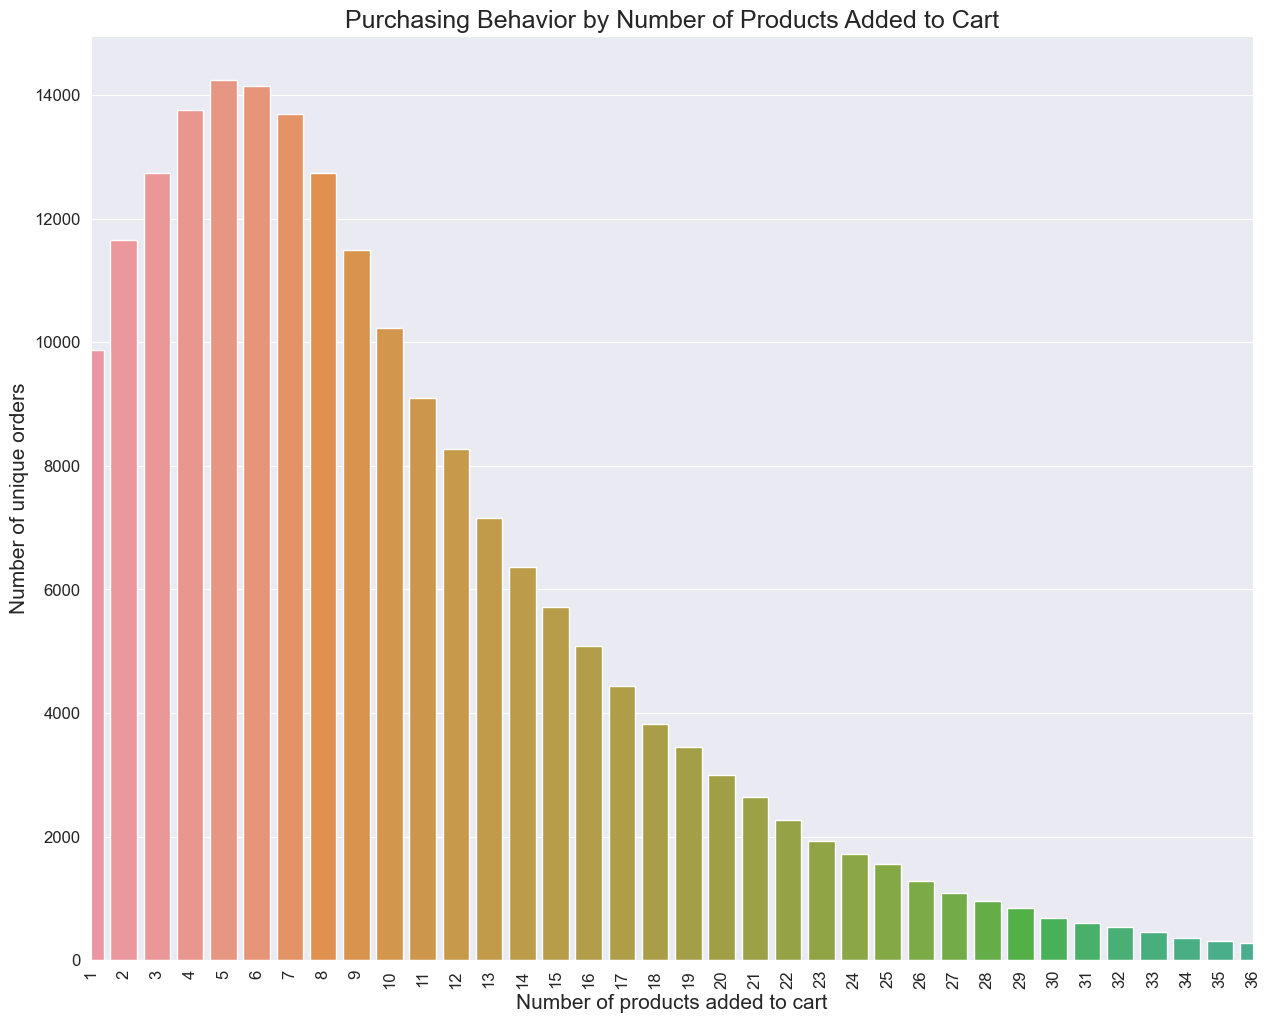

In [14]:
# Aggregating & grouping values to visualize purchasing behaviour
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
sns.set_palette("rocket_r")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
ax.grid(True, axis='y')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of unique orders', fontsize=15)
plt.xlabel('Number of products added to cart', fontsize=15)
plt.title('Purchasing Behavior by Number of Products Added to Cart', fontsize=18)
plt.xlim(0, 35)  # limit the X axis values to 35
plt.show()

<b>Note:</b>
</br>
From the above plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around 4-7 products.

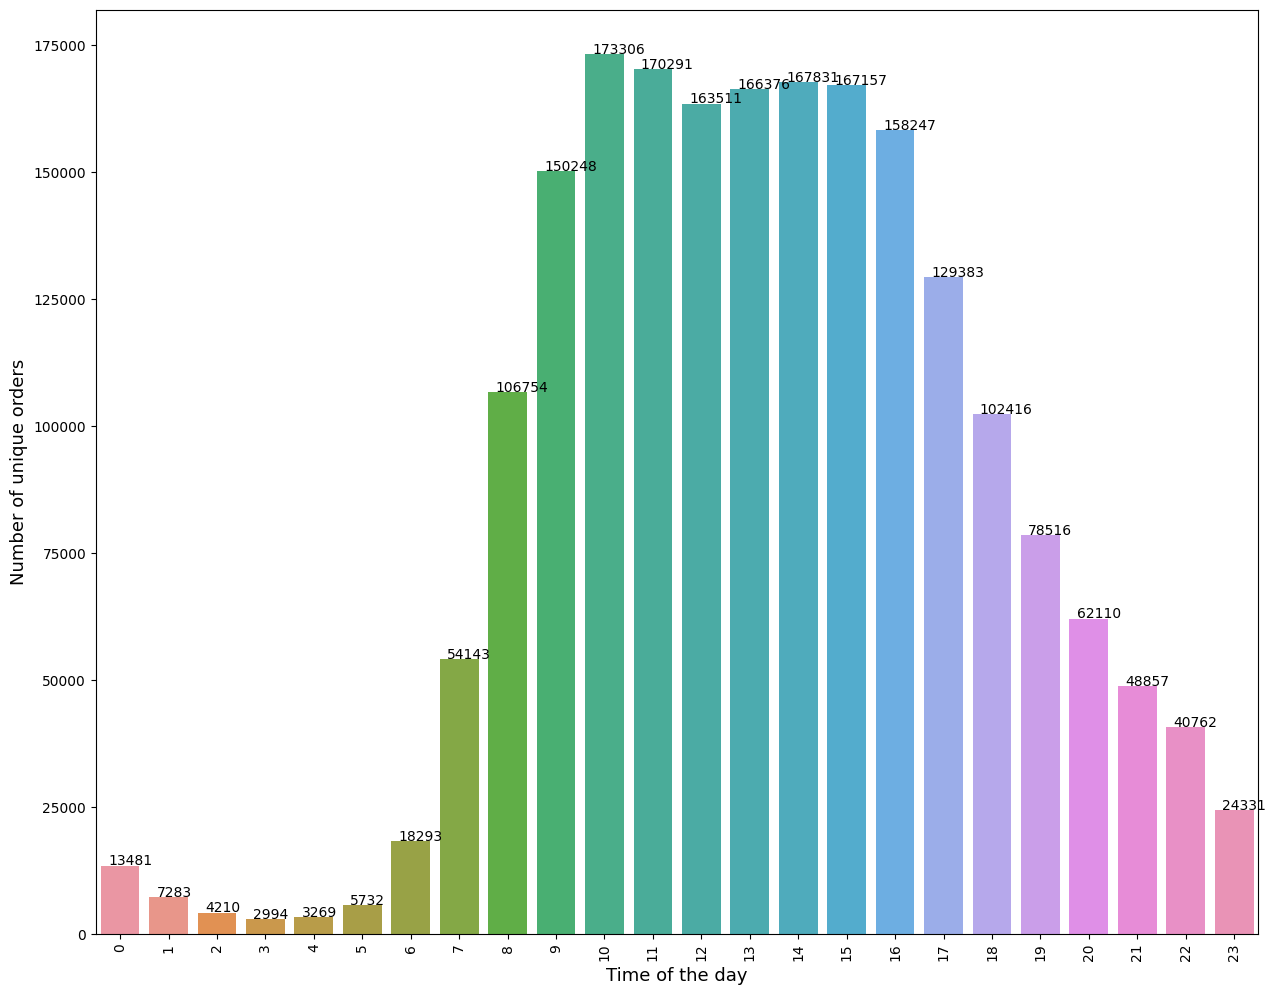

In [10]:
# Creating time based features
# TIME OF THE DAY WHEN THE ORDER WAS MADE
grouped = df.groupby('order_hour_of_day', as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)


f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x = grouped.index, y = grouped.user_id)
sns.color_palette("rocket_r", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Time of the day', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

plt.show()

### NOTE :
As we continue to explore further we can observe interesting trends which are as follows:
<ul>
    <li>The peak traffic is on a Monday between 10 AM - 16 PM which is the beginning of the week</li>
    <li>The low periods happen to be during the mid-week from Wednesday - Friday From 4 PM onwards</li>
</ul>

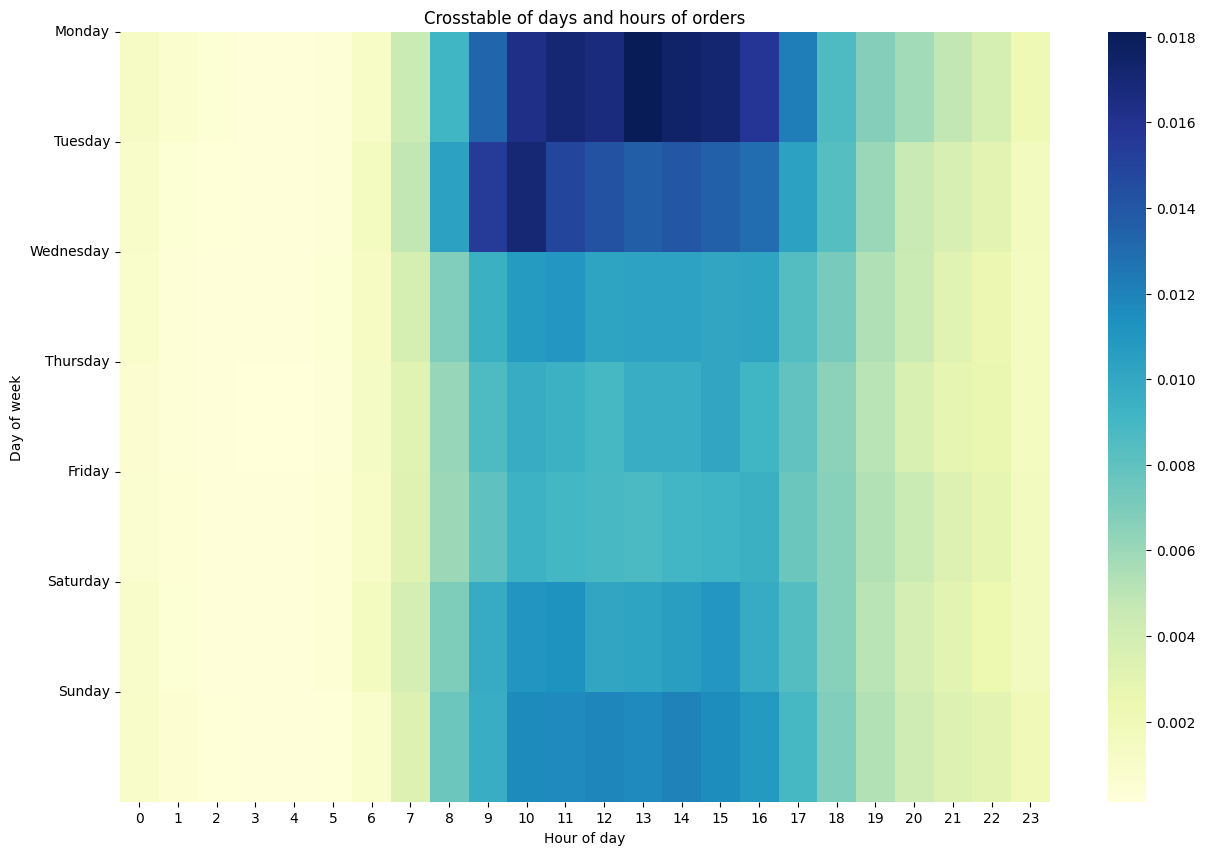

In [11]:
# Heatmap Study
day_hour_df = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
day_hour_df_piv = day_hour_df.pivot('order_dow', 'order_hour_of_day', 'order_number')/df.shape[0]

plt.figure(figsize=(15,10))
sns.heatmap(day_hour_df_piv, cmap='YlGnBu')
plt.yticks([0,1, 2, 3, 4, 5, 6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Hour of day")
plt.yticks(rotation=0)
plt.ylabel("Day of week")


plt.title("Crosstable of days and hours of orders");

In [12]:
def order_time(x):
    return f'{"morning" if x in range(6, 12) else "afternoon" if x in range(12, 18) else "evening" if x in range(18, 23) else "night"}'

df['order_time_period'] = df['order_hour_of_day'].apply(order_time)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening


In [13]:
df.pivot_table(index='order_dow',columns='order_time_period',values='user_id',aggfunc=['count'])

count                       
order_time_period afternoon evening morning  night
order_dow                                         
0                    196603   60195  123876  11157
1                    158970   51825  129591   8850
2                    120927   45497   87562   7926
3                    112185   41737   77609   7199
4                    107170   45359   74338   8017
5                    121577   42311   89662   8607
6                    135073   45737   90397   9544

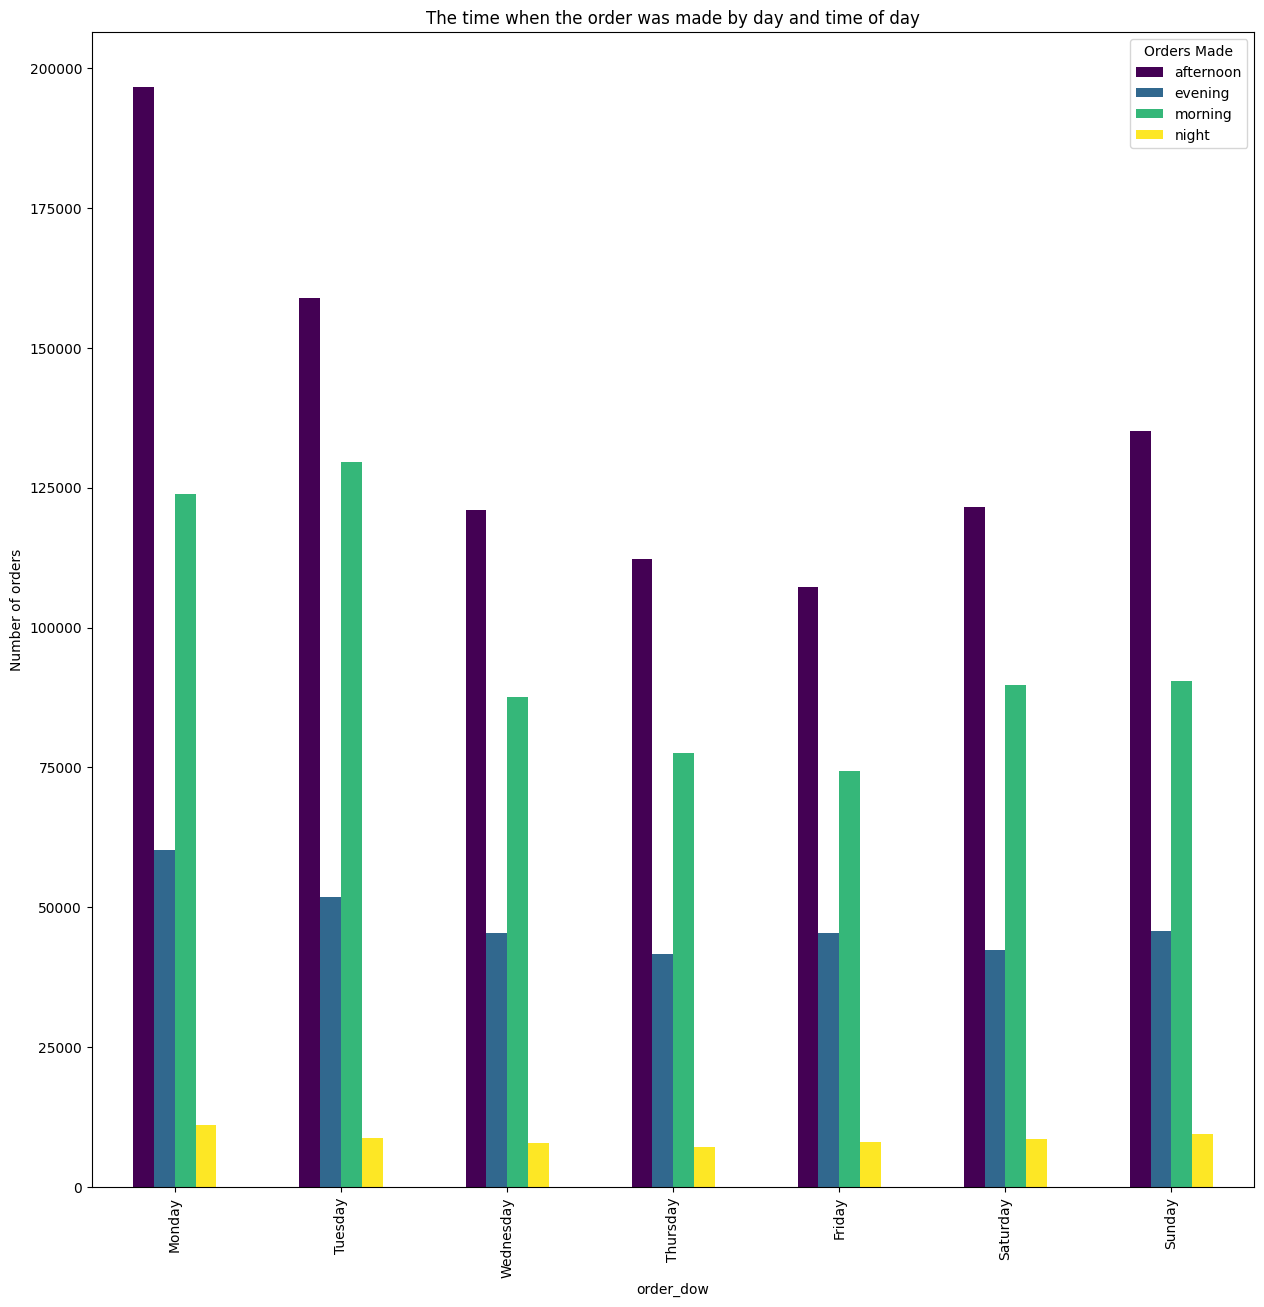

In [14]:
# Visualizing order time period
# Define the color palette
color_palette = plt.get_cmap('viridis')

# Generate the plot
orders_by_day_time = df.pivot_table(
    index='order_dow',
    columns='order_time_period',
    values='user_id',
    aggfunc='count'
)

ax = orders_by_day_time.plot(kind='bar', figsize=(15, 15), color=color_palette(np.linspace(0, 1, len(orders_by_day_time.columns))))
ax.set_title('The time when the order was made by day and time of day')
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) # fixed the x-axis labels
ax.set_ylabel('Number of orders')
ax.legend(title='Orders Made', bbox_to_anchor=(1.0, 1.0))
plt.show()

### NOTE :
The above plot again give us a global overview where we can observe trends:
<ul>
    <li>Where most customers prefer to order between morning and early afternoon</li>
    <li>Relatively quiet few customers order during evenig and night</li>
</ul>

In [15]:
# Creating order group feature
def order_number_group(num_orders):
    ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50),(51, 60),(61, 70),(71, 80),(81, 90),(91, 100)]
    for r in ranges:
        if num_orders in range(r[0], r[1]+1):
            return f"{r[0]}-{r[1]} orders"
    return "More than 100 orders"

df['order_number_group']=df['order_number'].apply(order_number_group)
df


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period,order_number_group
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening,1-10 orders
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10 orders
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening,1-10 orders
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening,1-10 orders
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening,1-10 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,11-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-50 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-50 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-50 orders


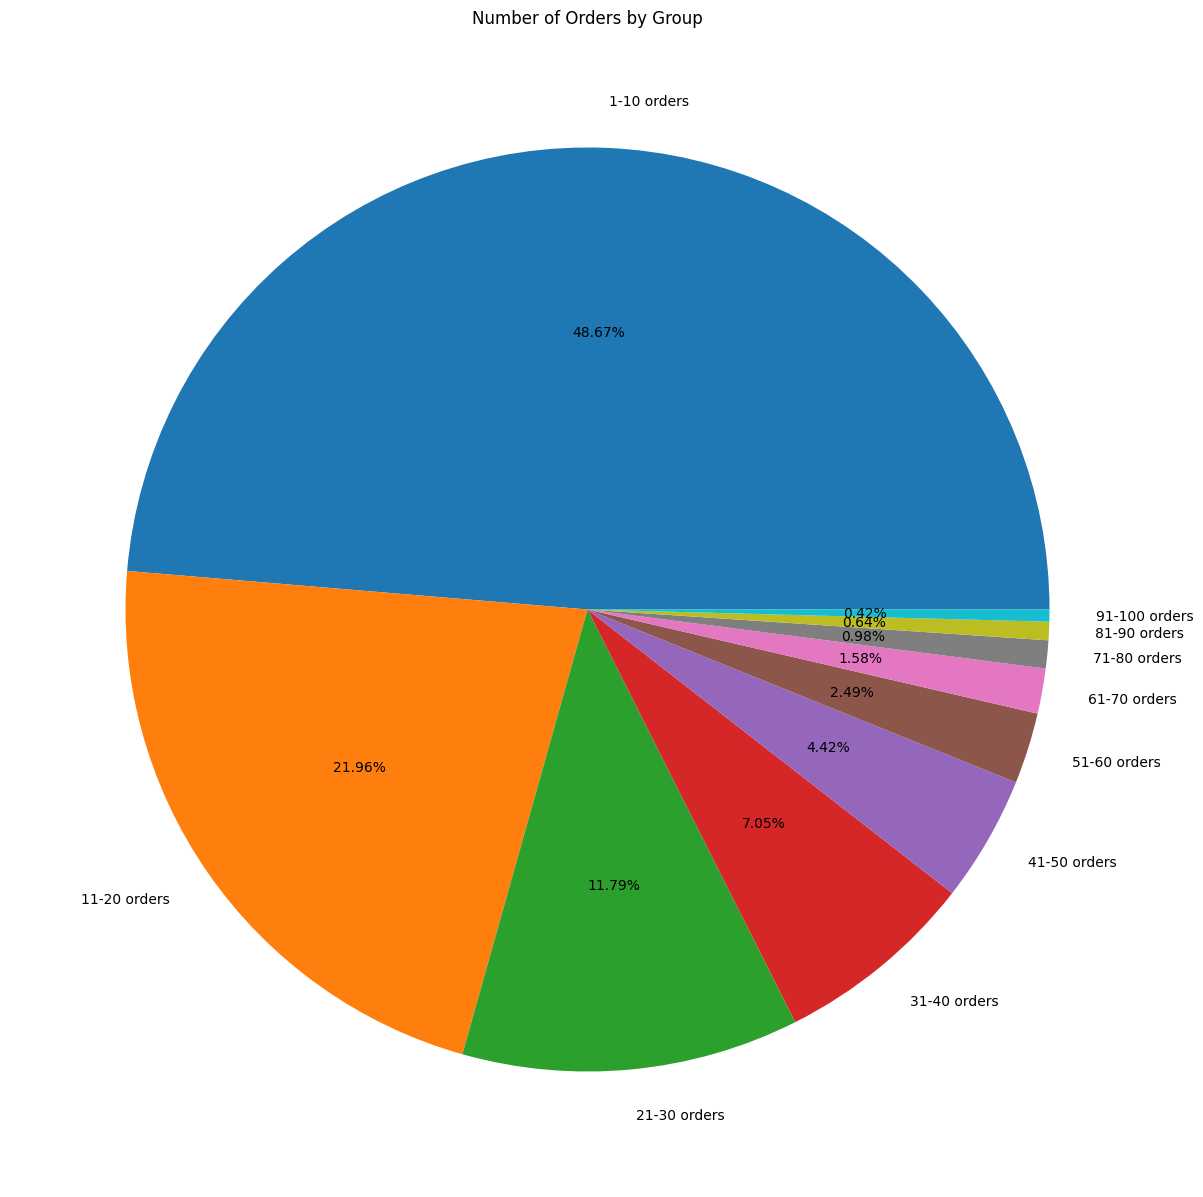

In [16]:
# Visualizing order group feature
orders_by_group = df.groupby('order_number_group')['user_id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('lightgray')

orders_by_group.plot(kind='pie', autopct='%1.2f%%', title='Number of Orders by Group', ax=ax)
ax.set_ylabel('')

plt.show()


### NOTE :
The above pie chart give us a global overview of market basket analysis trend:
<ul>
    <li>Out of all the products, approximately 49% were purchased from the category 1-10 group</li>
</ul>

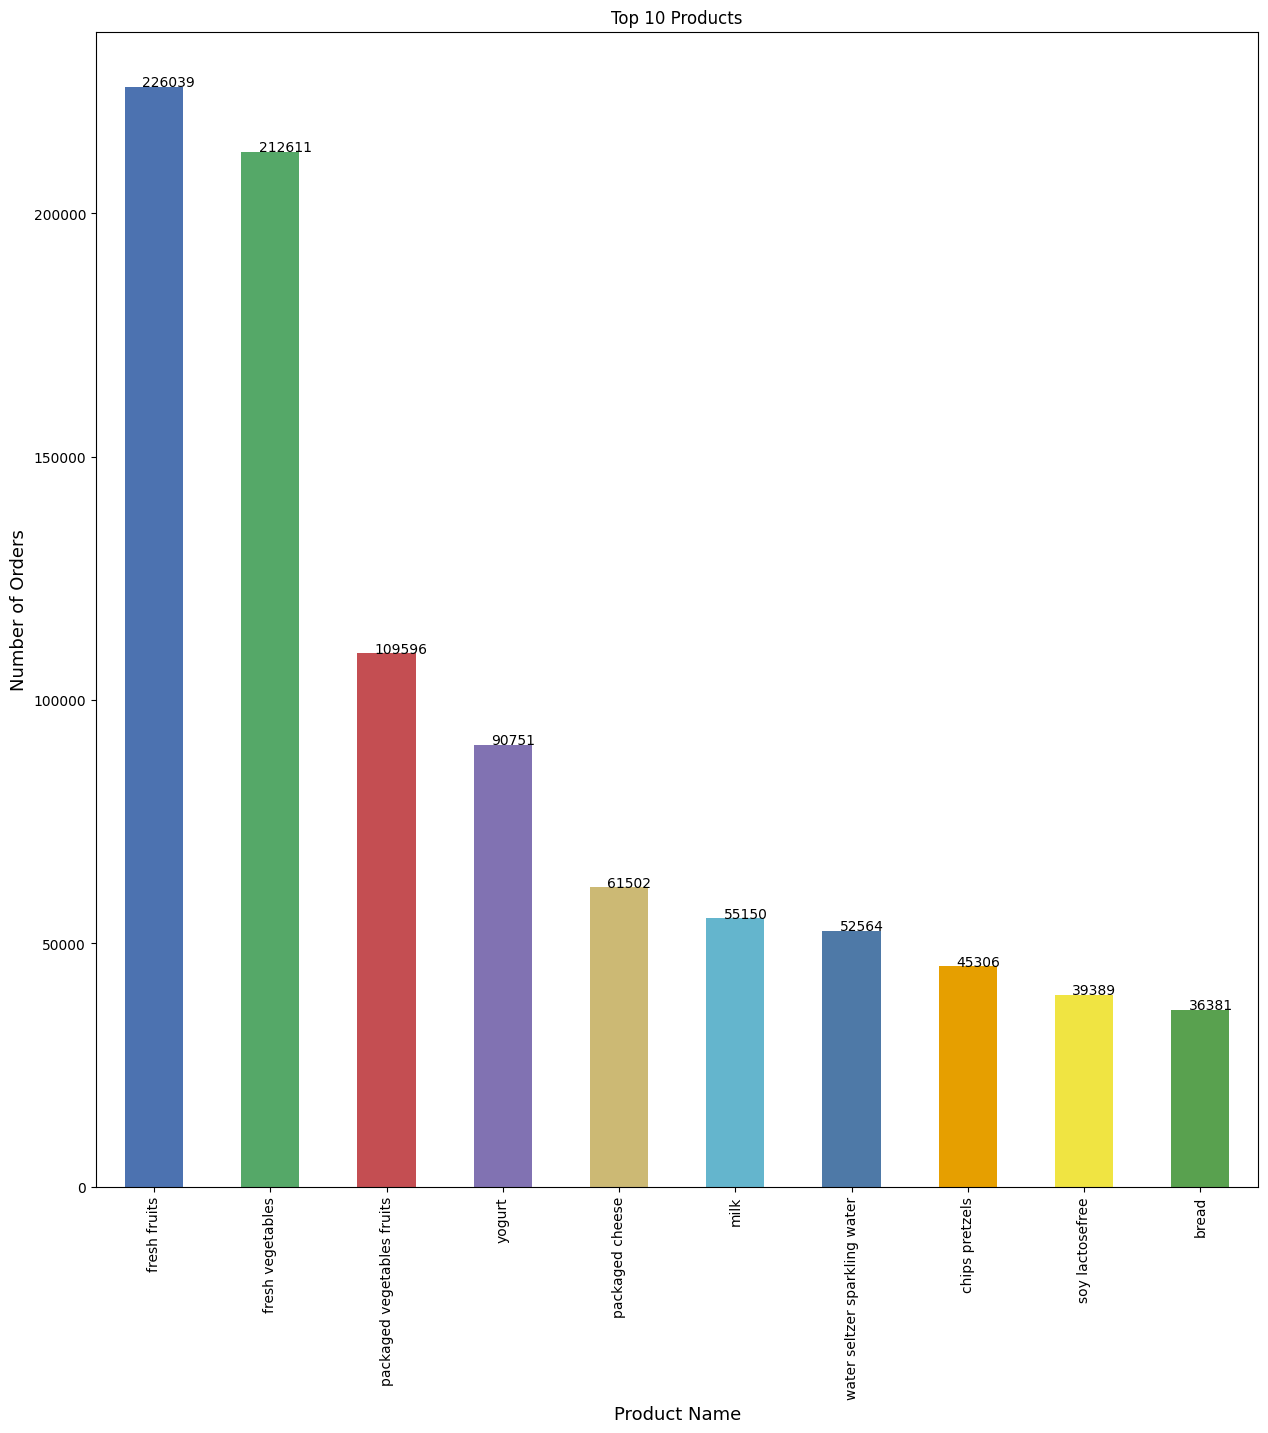

In [17]:
# Visualizing top 10 products
top_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = top_products.plot(kind='bar', title='Top 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

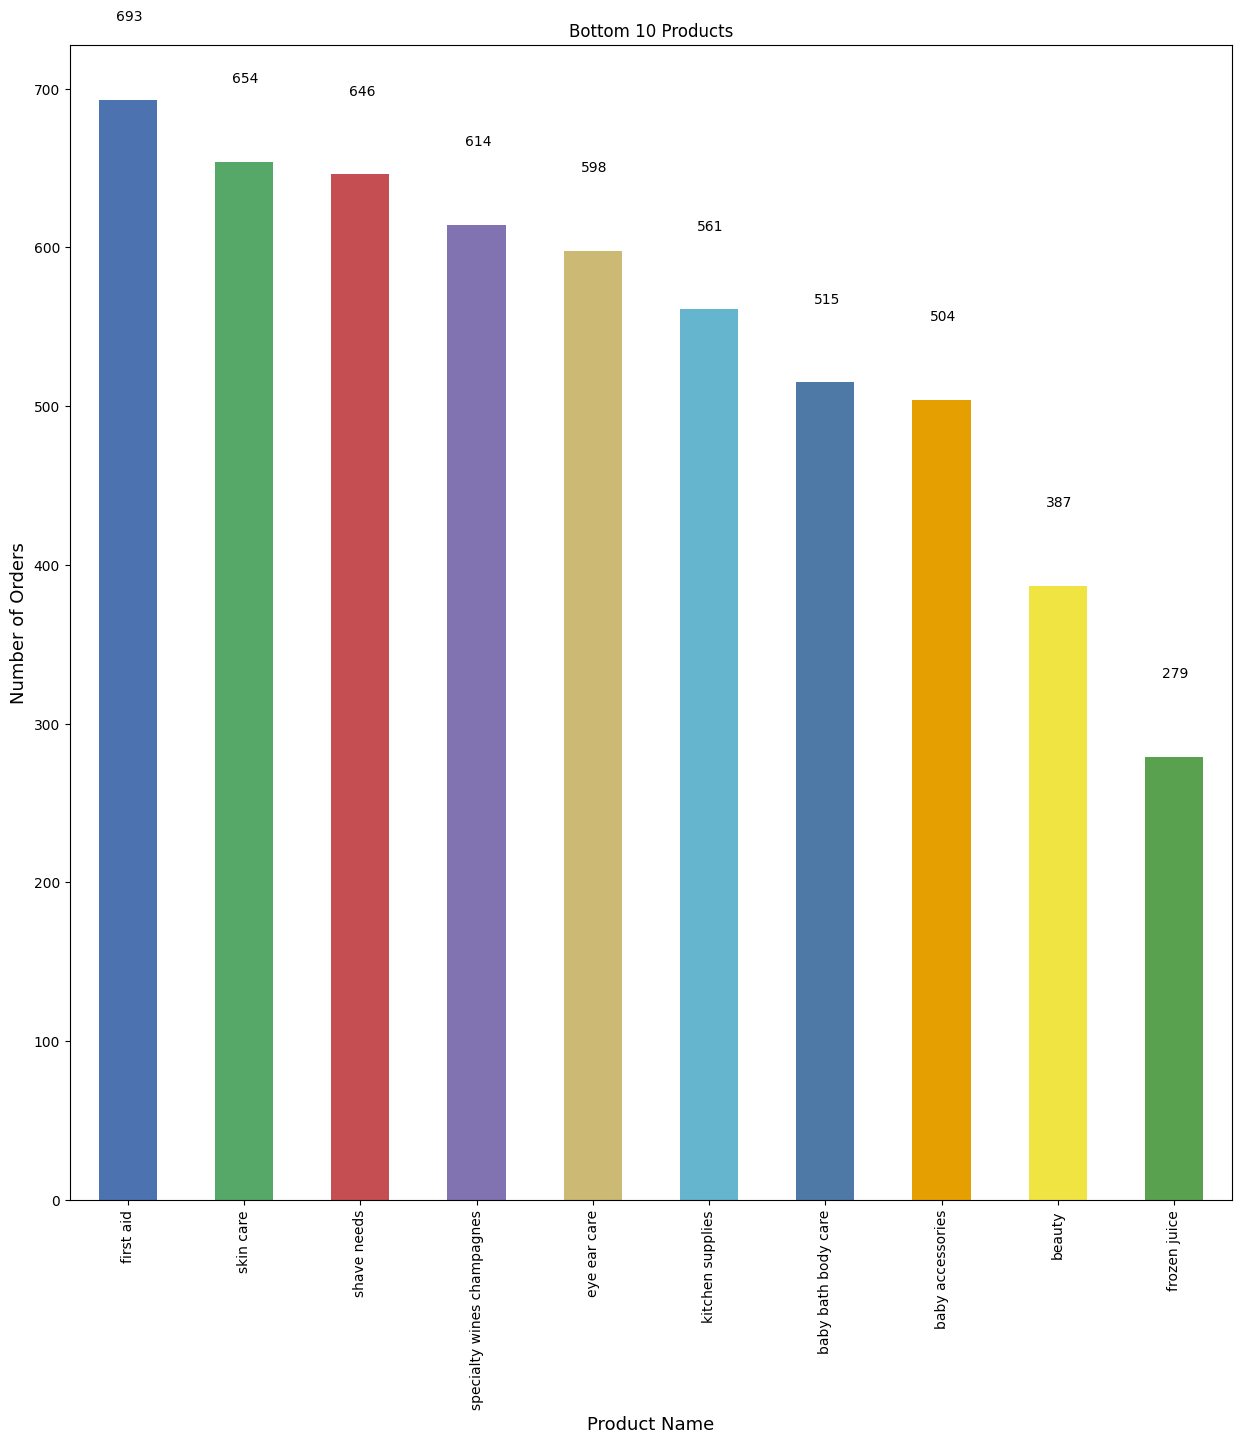

In [18]:
# Visualizing bottom 10 products
bottom_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).tail(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = bottom_products.plot(kind='bar', title='Bottom 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

In [19]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department","order_time_period"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
del grouped["index"]
grouped

,product_id,product_name,department,order_time_period,reordered
0,24,fresh fruits,produce,afternoon,104177
1,83,fresh vegetables,produce,afternoon,102115
2,24,fresh fruits,produce,morning,77479
3,83,fresh vegetables,produce,morning,68634
4,123,packaged vegetables fruits,produce,afternoon,51493
5,120,yogurt,dairy eggs,afternoon,41484
6,24,fresh fruits,produce,evening,37544
7,123,packaged vegetables fruits,produce,morning,36210
8,83,fresh vegetables,produce,evening,35026
9,120,yogurt,dairy eggs,morning,31412


<b>NOTE :</b>
From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the customers are most interested to purchase

In [20]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


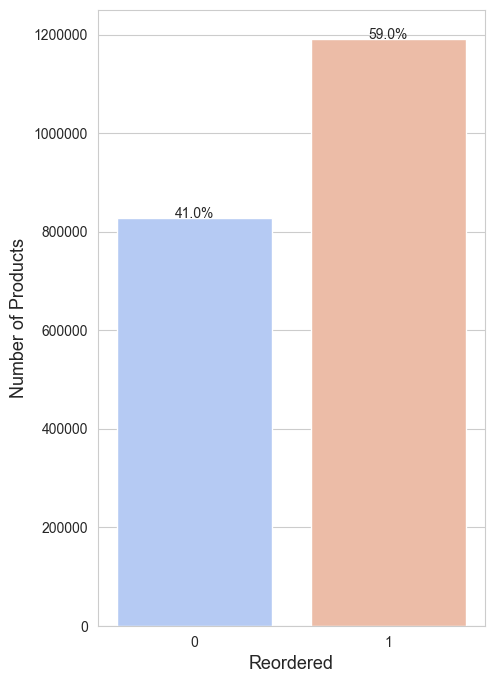

In [21]:
# Aggregating & grouping values to visualize reordered ratio
grouped = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=True)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')

grouped_pct = grouped/grouped.sum() * 100
for i, v in enumerate(grouped.values):
    ax.text(i, v+3, f'{grouped_pct.values[i]:.1f}%', ha='center', fontsize=10)

plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<b>NOTE :</b>
From the above we can see that 59 % of products were reordered by customers.

## 3. MODELING

#### K-Means Clustering:
K-means clustering is an unsupervised learning algorithm that divides a dataset into k clusters, where k is the number of clusters specified by the researcher. The goal of the algorithm is to minimize the sum of squared distances between the points in a cluster and the centroid of the cluster.


#### Therefore, the following are the methodological steps we will be taking to build our model:
<ul>
    <li>First step we will be training & experimenting K-means with 6 clusters (testing version)</li>
    <li>Second step we will try to run the K-means on a rang of 2 -10 clusters (to find optimal number of cluster)</li>
    <li>Creat Scree plot to visualize the inertia using Elbow method (for visualization)</li>
    <li>Re-running K-means with 5 cluster</li>
</ul>

In [22]:
len(df.product_id.unique())

134

In [23]:
# UNDERSTANDING DATA DISTRIBUTION BY USING CROSSTAB TO GET ROW WISE PROPORTION FOR EARCH DEPARTMENT
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [24]:
# RUNNING K-MEANS
X_train = clst_prd.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [5 0 2 ... 5 0 2]
The Inertia is : 4996208.594400629


Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

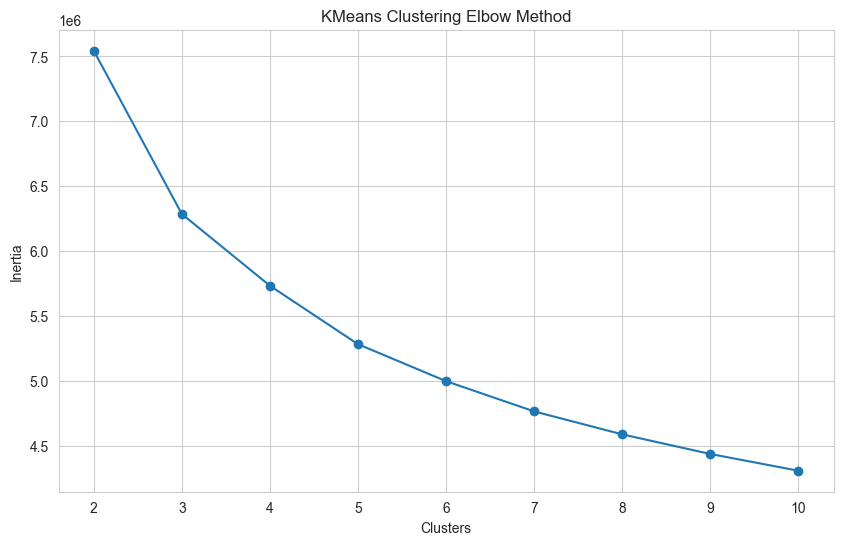

In [26]:
# Step 1: Set range of clusters to try and 
# create inertia values dictionary
clusters_range = (2,10)
inertia_values = {}

# Step 2: For each set of clusters fit a kmeans algorithm and add
# inertia value to interia values dictionary
for clusters in range(clusters_range[0], clusters_range[1] + 1):
    k_means = KMeans(n_clusters=clusters,
                     random_state=101)
    k_means.fit(X_train)
    inertia_values[str(clusters)] = k_means.inertia_

# Step 3: Plot inertia values dictionary to assess optimum
# number of clusters to use
plt.figure(figsize=(10,6))

plt.plot(inertia_values.keys(),
         inertia_values.values(),
         marker='o')

plt.title('KMeans Clustering Elbow Method')
plt.ylabel('Inertia')
plt.xlabel('Clusters')

plt.show()

<b>Note:</b>
</br>
From the above plot we can come to an understanding that the inertia score start to drop drastically <b>between 4 - 5 number of cluster</b>. Thefore, I have decided to choose 5 number of cluster to grain granularity on our study

In [27]:
# RE-RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,62784,5843,8038,1926,26682


<b>Advantages of k-means</b>
<ul>
    <li>Simple and easy to implement: The k-means algorithm is easy to understand and implement, making it a popular choice for clustering tasks.</li>
    <li>Fast and efficient: K-means is computationally efficient and can handle large datasets with high dimensionality.</li>
    <li>Scalability: K-means can handle large datasets with a large number of data points and can be easily scaled to handle even larger datasets.</li>
    <li>Flexibility: K-means can be easily adapted to different applications and can be used with different distance metrics and initialization methods.</li>
</ul>

<b>Disadvantages of K-Means:</b>
<ul>
    <li>Sensitivity to initial centroids: K-means is sensitive to the initial selection of centroids and can converge to a suboptimal solution.</li>
    <li>Requires specifying the number of clusters: The number of clusters k needs to be specified before running the algorithm, which can be challenging in some applications.</li>
    <li>Sensitive to outliers: K-means is sensitive to outliers, which can have a significant impact on the resulting clusters.</li>
</ul>
<b>Applications of K-Means Clustering</b>

K-Means clustering is used in a variety of examples or business cases in real life, like:
</ul>
    <li>Academic performance 
    <li>Diagnostic systems 
    <li>Search engines 
    <li>Wireless sensor networks</li>
</ul>